In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score, root_mean_squared_error
import seaborn as sns

In [2]:
df_scaled = pd.read_csv('df_scaled.csv')

In [3]:
features = ['danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'year']

In [4]:
# Dividimos nuestros datos para entrenamiento y test
X = df_scaled[features]
y = df_scaled['track_popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Primero entrenamos un árbol sin restricciones de profundidad ni poda y evaluamos el rendimiento.

In [5]:
# Creamos el primer árbol sin podar
dt = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                   random_state=42)

dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [6]:
# Vemos el tamaño del árbol (número de nodos y profundidad)
tree_depth = dt.get_depth()
tree_n_leaves = dt.get_n_leaves()

print(f"Profundidad del árbol: {tree_depth}")
print(f"Número de hojas: {tree_n_leaves}")

Profundidad del árbol: 38
Número de hojas: 16742


In [7]:
# Entrenamos y evaluamos el modelo
y_pred = dt.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2: {r2}")

MAE: 0.20634659891509885
MSE: 0.06758967006369086
RMSE: 0.25998013397890785
MAPE: 12899900371649.299
R2: -0.7613954360234945


#### Ahora realizamos una búsqueda del mejor valor de ccp_alpha usando GridSearchCV

In [8]:
dt_regressor = DecisionTreeRegressor(criterion='squared_error', splitter='best', 
                                   max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                   random_state=42)

# Definimos el rango de valores para ccp_alpha
param_grid = {
    'ccp_alpha': np.linspace(0, 0.5, 1000)
}

# Configuramos GridSearchCV con validación cruzada (cv=5)
grid_search = GridSearchCV(dt_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)

In [9]:
# Entrenamos con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtenemos el mejor valor de ccp_alpha y el mejor modelo entrenado
best_alpha = grid_search.best_params_['ccp_alpha']
best_model = grid_search.best_estimator_

print(f"Mejor valor de ccp_alpha: {best_alpha}")

Mejor valor de ccp_alpha: 0.0005005005005005005


In [10]:
# Vemos el tamaño del árbol (número de nodos y profundidad)
tree_depth = best_model.get_depth()
tree_n_leaves = best_model.get_n_leaves()

print(f"Profundidad del árbol: {tree_depth}")
print(f"Número de hojas: {tree_n_leaves}")

Profundidad del árbol: 1
Número de hojas: 2


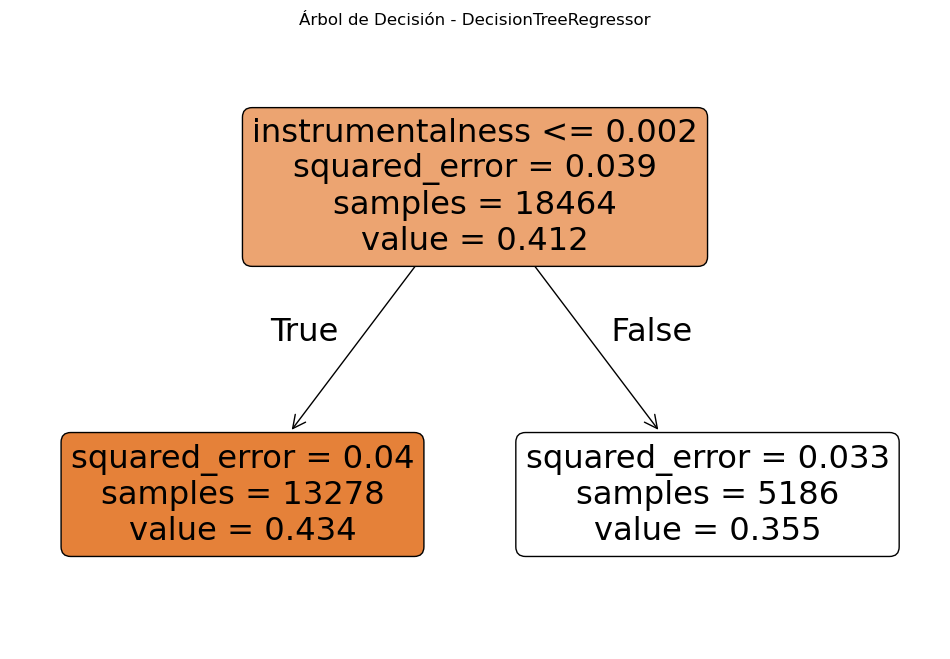

In [11]:
#Gráficamos el árbol
plt.close('all')
plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=features, rounded=True)
plt.title("Árbol de Decisión - DecisionTreeRegressor")
plt.show()

#### Por último entrenamos y evaluamos el mejor modelo

In [12]:
# Entrenamos y evaluamos el mejor modelo
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2: {r2}")

MAE: 0.16056112256875973
MSE: 0.037538951970921684
RMSE: 0.1937497147634589
MAPE: 11040546870021.352
R2: 0.021730116268066313


Vemos que las métricas en general mejoraron ligeramente en relación al árbol inicial, pero es importante destacar que se redujo considerablemente el árbol.